In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('/content/tittanic_train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [9]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred = clf.predict(x_test)

In [11]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [12]:
clf = DecisionTreeClassifier()
np.mean(cross_val_score(clf, x, y, cv=10, scoring='accuracy'))

0.630281690140845

In [24]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [25]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [26]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [27]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [28]:
#To check intervals
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [29]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [30]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:, 0],
    'fare': x_train['Fare'],
    'fare_trf': x_train_trf[:, 1]
})

In [31]:
output['age_labels'] = pd.cut(x=x_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [32]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
84,17.0,2.0,10.5000,5.0,"(16.0, 19.0]","(8.158, 10.5]"
323,22.0,4.0,29.0000,10.0,"(21.0, 23.0]","(26.55, 31.275]"
397,46.0,12.0,26.0000,9.0,"(42.0, 47.0]","(18.75, 26.0]"
607,27.0,6.0,30.5000,10.0,"(25.0, 28.0]","(26.55, 31.275]"
299,50.0,13.0,247.5208,14.0,"(47.0, 54.0]","(108.9, 512.329]"


In [33]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test_trf)

In [34]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [35]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy'))

0.6723004694835681

In [36]:
def discretize(bins, strategy):
  kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
  kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)

  trf = ColumnTransformer([
      ('first', kbin_age, [0]),
      ('second', kbin_fare, [1])
  ])

  x_trf = trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy')))

  plt.figure(figsize=(14, 4))
  plt.subplot(1, 2, 1)
  plt.hist(x['Age'])
  plt.title('Before')

  plt.subplot(1, 2, 2)
  plt.hist(x_trf[:, 0], color='red')
  plt.title('After')

  plt.show()

0.682140062597809


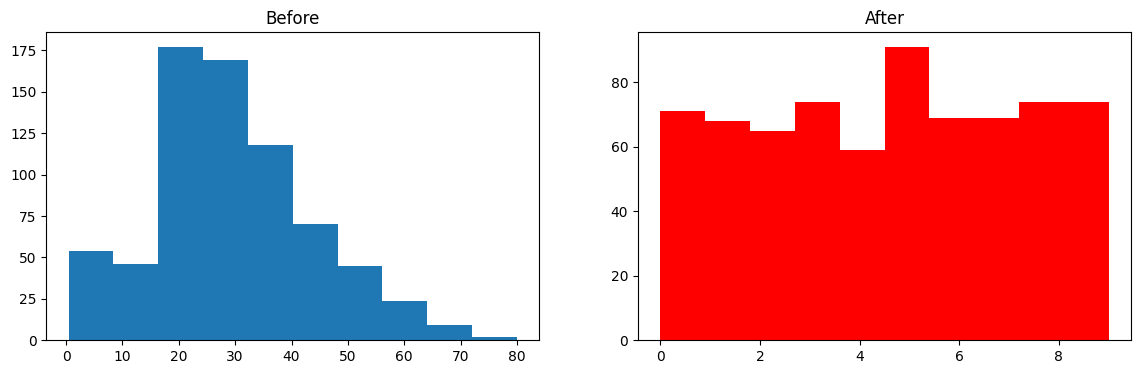

In [37]:
discretize(10, 'quantile')

0.6864632237871675


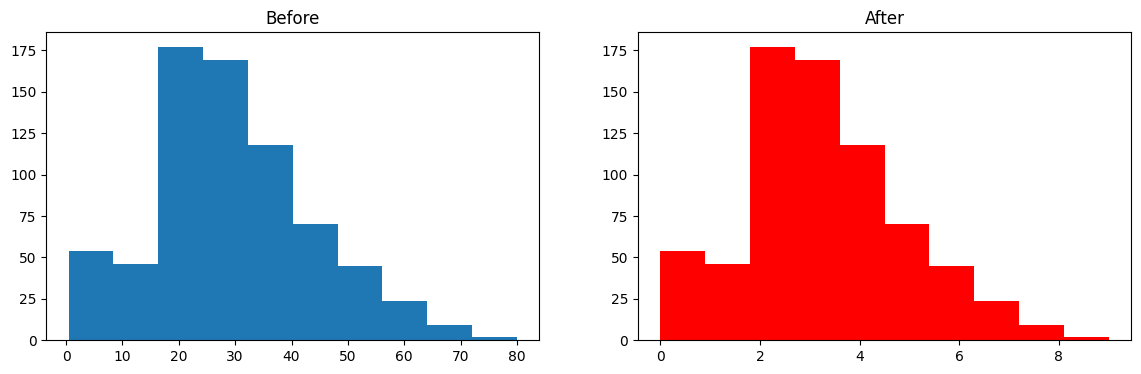

In [38]:
discretize(10, 'uniform')

0.6655320813771518


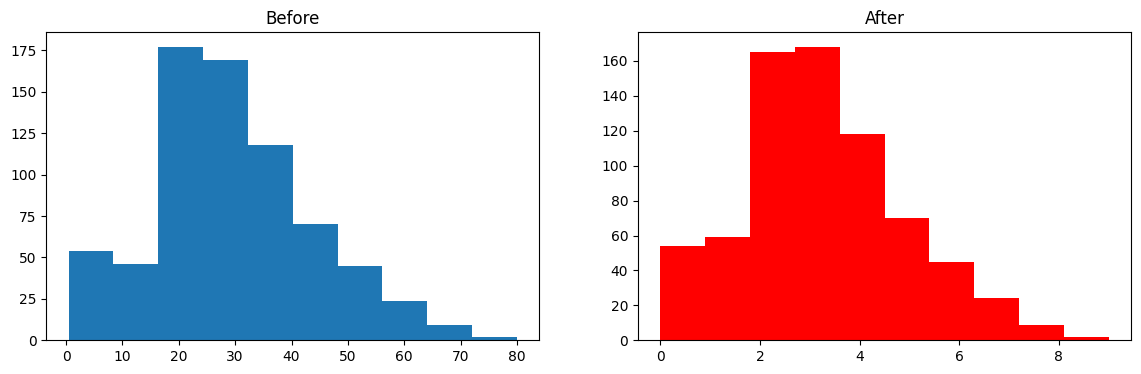

In [39]:
discretize(10, 'kmeans')